# Figure 4

In this notebook we will generate Figure 4, which contains a dendrogram and heatmap from fineStructure. Steps:
1. Read the coancestry and tree files
2. Keep only common ids
3. Order coancestry matrix according to tree file
4. Plot them together

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import xml.etree.ElementTree as ET
from ete3 import Tree

## Reading files

We'll read the coancestry and tree files

In [2]:
#Folders
projpath = os.path.realpath("../..")
pathfs   = os.path.join(projpath, "DataBases", "Genotypes", "FineStructure")
pathres  = os.path.join(projpath, "Results")

In [3]:
os.chdir(pathfs)
coances = pd.read_table("total_fs_linked.chunkcounts.out", skiprows = 1, sep = " ", index_col = 0)
os.chdir(pathres)
com_ids = pd.read_csv("common_ids.txt", header=None)

/home/tomas/anaconda3/envs/main_analysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [188]:
#Reading tree
#Parsing xml
os.chdir(pathfs)
tree = ET.parse('total_fs_linked.greedy_outputfile.xml') 
root = tree.getroot() 
for child in root:
    print(child.tag, child.attrib)

for i in root.iter('Tree'):
    poptree = i.text
    
dendtree = Tree(poptree) #from ete3

header {}
comment {}
Iteration {}
Tree {}


## Pruning

We'll keep only the IDs from common IDs file

In [56]:
#Coancestry matrix
#Use columns and not the rows!
coances_cols = coances.columns
keep    = coances_cols.isin(com_ids.iloc[:,0])
coances = coances.iloc[keep, keep]

In [193]:
#Tree
dendtree.prune(list(com_ids.iloc[:,0]), preserve_branch_length=True)

## Order

We'll order the coancestry matrix based on the tree

In [30]:
leaf_names = dendtree.get_leaf_names()

In [170]:
sort_index = []
for x in (leaf_names):
    l = list(coances_cols).index(x)
    sort_index.append(l)

In [172]:
coances = coances.iloc[sort_index, sort_index]

## Plot

Now, we'll plot the coancestry matrix and the tree

In [214]:
#Scaling values
test    = np.matrix(coances)
#Cap max value
max_val = 20
test[test > max_val] = max_val

#OR
test2   = np.matrix(coances)
test2[test2 > 0] = np.log(test2[test2 > 0])

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

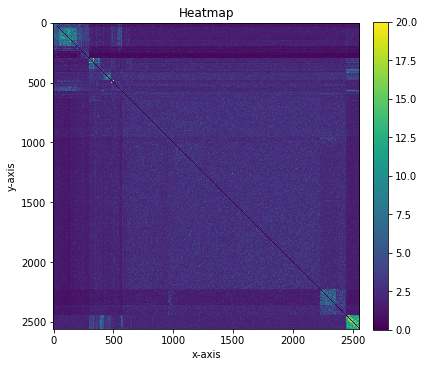

In [183]:
fig = plt.figure(figsize=(6,6))
plt.clf()        

ax = fig.add_subplot(111)
toplot = test
res = ax.imshow(toplot, cmap=plt.cm.viridis, vmin = 0)    
cb = fig.colorbar(res,fraction=0.046, pad=0.04)


plt.title('Heatmap')

plt.xlabel('x-axis')
plt.ylabel('y-axis')

row = np.where(toplot == toplot.max())[0][0]
column= np.where(toplot == toplot.max())[1][0]

plt.plot(column,row,'*')
plt.show()

In [217]:
test2[test2 > 0]

matrix([[ 4.457303,  7.052306,  5.523225, ..., 18.371784, 17.273151,
         16.317996]])